In [1]:
#import glassdoor_scrapper as gs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('glassdoor_jobs.csv')

In [3]:
df = df[df['Salary Estimate'] != '-1']

In [4]:
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [5]:
minus_kd = salary.apply(lambda x: x.replace('K','').replace('$',''))

In [6]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)

In [7]:
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

In [8]:
min_hr = minus_kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

In [9]:
df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))

In [10]:
df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))

In [11]:
df['average_salary'] = (df.min_salary+df.max_salary)/2

In [12]:
df['company_txt']= df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3],axis=1)

In [13]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])

In [14]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [15]:
df['same_state'] = df.apply(lambda x:1 if x.Location == x.Headquarters else 0,axis=1)

In [16]:
df['age'] = df.Founded.apply(lambda x: x if x <1 else 2020-x)

In [17]:
df['Job Description'][0]

'Data Scientist\r\nLocation: Albuquerque, NM\r\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\r\nSkills Required:\r\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\r\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\r\nExcellent verbal and written communication skills, and quantitative analytical skills are required\r\nApplicant must be able to work in a team environment\r\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\r\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic mode

In [18]:
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [19]:
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-Studio' in x.lower() else 0)

In [20]:
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

In [21]:
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

In [22]:
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [23]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [24]:
df_out=df.drop(['Unnamed: 0'],axis=1)

In [25]:
df_out.to_csv('salary_data_cleaned.csv',index=False)

In [26]:
df101 = pd.read_csv('salary_data_cleaned.csv')
df101.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  What You Will Do:\r\n\r\nI. General Summary\r\...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\r\nJob ID: 310709\r...     3.8   
4  Data Scientist\r\nAffinity Solutions / Marketi...     2.9   

                                   Company Name         Location  \
0                      Tecolote Research\r\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\r\n3.4    Linthicum, MD   
2                                KnowBe4\r\n4.8   Clearwater, FL   
3                                   PNNL\r\n3.8     Richland, WA   
4                     Affinity Solutions\r\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  ...  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private  ...   
1   Baltimore, MD        10000+ employees     1984  Other Organization  ...   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private  ...   
3    Richland, WA  1001 to 5000 employees     1965          Government  ...   
4    New York, NY     51 to 200 employees     1998   Company - Private  ...   

  average_salary                                company_txt job_state  \
0           72.0                      Tecolote Research\r\n        NM   
1           87.5  University of Maryland Medical System\r\n        MD   
2           85.0                                KnowBe4\r\n        FL   
3           76.5                                   PNNL\r\n        WA   
4          114.5                     Affinity Solutions\r\n        NY   

  same_state  age  python_yn  R_yn  spark  aws excel  
0          0   47          1     0      0    0     1  
1          0   36          1     0      0    0     0  
2          1   10          1     0      1    0     1  
3          1   55          1     0      0    0     0  
4          1   22          1     0      0    0     1  

[5 rows x 28 columns]

In [27]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('salary_data_cleaned.csv')
df.head()




Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  What You Will Do:\r\n\r\nI. General Summary\r\...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\r\nJob ID: 310709\r...     3.8   
4  Data Scientist\r\nAffinity Solutions / Marketi...     2.9   

                                   Company Name         Location  \
0                      Tecolote Research\r\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\r\n3.4    Linthicum, MD   
2                                KnowBe4\r\n4.8   Clearwater, FL   
3                                   PNNL\r\n3.8     Richland, WA   
4                     Affinity Solutions\r\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  hourly  \
0                                                 -1       0   
1                                                 -1       0   
2                                                 -1       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   employer_provided  min_salary  max_salary  average_salary  \
0                  0          53          91            72.0   
1                  0          63         112            87.5   
2                  0          80          90            85.0   
3                  0          56          97            76.5   
4                  0          86         143           114.5   

                                 company_txt job_state  same_state  age  \
0                      Tecolote Research\r\n        NM           0   47   
1  University of Maryland Medical System\r\n        MD           0   36   
2                                KnowBe4\r\n        FL           1   10   
3                                   PNNL\r\n        WA           1   55   
4                     Affinity Solutions\r\n        NY           1   22   

   python_yn  R_yn  spark  aws  excel  
0          1     0      0    0      1  
1          1     0      0    0      0  
2          1     0      1    0      1  
3          1     0      0    0      0  
4          1     0      0    0      1

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [29]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
    

In [30]:
df['job_simplifier'] = df['Job Title'].apply(title_simplifier)

In [31]:
df.job_simplifier.value_counts()

data scientist    279
na                187
data engineer     119
data analyst       99
manager            22
mle                22
director           14
Name: job_simplifier, dtype: int64

In [32]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [33]:

df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [34]:
# job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [35]:
#competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [36]:
# hourly wage into annual wage
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)


In [37]:
df[df.hourly == 1][['min_salary','max_salary','hourly']]

min_salary  max_salary  hourly
165          34          48       1
177          42          68       1
197          36          50       1
202          42          68       1
210          30          50       1
246          34          48       1
271          42          68       1
337          36          50       1
345          48          78       1
357          42          68       1
363          50          56       1
408          42          58       1
409          20          34       1
492          36          50       1
509          48          78       1
533          42          68       1
542          50          56       1
617          42          58       1
618          20          34       1
645          54          94       1
666          36          50       1
682          48          78       1
711          42          68       1
724          50          56       1

In [38]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n','').replace('\r',''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [39]:
df.describe()

Rating      Founded      hourly  employer_provided  min_salary  \
count  742.000000   742.000000  742.000000         742.000000  742.000000   
mean     3.618868  1837.154987    0.032345           0.022911   74.719677   
std      0.801210   497.183763    0.177034           0.149721   30.980593   
min     -1.000000    -1.000000    0.000000           0.000000   15.000000   
25%      3.300000  1939.000000    0.000000           0.000000   52.000000   
50%      3.700000  1988.000000    0.000000           0.000000   69.500000   
75%      4.000000  2007.000000    0.000000           0.000000   91.000000   
max      5.000000  2019.000000    1.000000           1.000000  202.000000   

       max_salary  average_salary  same_state         age   python_yn  \
count  742.000000      742.000000  742.000000  742.000000  742.000000   
mean   128.149596      100.626011    0.557951   46.591644    0.528302   
std     45.220324       38.855948    0.496965   53.778815    0.499535   
min     16.000000       13.500000    0.000000   -1.000000    0.000000   
25%     96.000000       73.500000    0.000000   11.000000    0.000000   
50%    124.000000       97.500000    1.000000   24.000000    1.000000   
75%    155.000000      122.500000    1.000000   59.000000    1.000000   
max    306.000000      254.000000    1.000000  276.000000    1.000000   

             R_yn       spark         aws       excel      desc_len  \
count  742.000000  742.000000  742.000000  742.000000    742.000000   
mean     0.001348    0.225067    0.237197    0.522911   3910.172507   
std      0.036711    0.417908    0.425651    0.499812   1533.827777   
min      0.000000    0.000000    0.000000    0.000000    407.000000   
25%      0.000000    0.000000    0.000000    0.000000   2834.000000   
50%      0.000000    0.000000    0.000000    1.000000   3781.500000   
75%      0.000000    0.000000    0.000000    1.000000   4772.000000   
max      1.000000    1.000000    1.000000    1.000000  10146.000000   

         num_comp  
count  742.000000  
mean     1.053908  
std      1.384239  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      3.000000  
max      4.000000

In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simplifier',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot: >

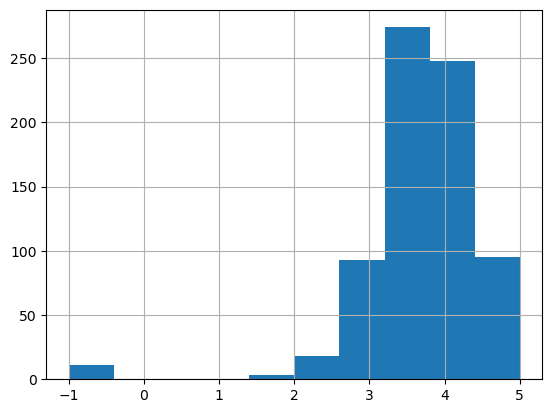

In [41]:
df.Rating.hist()

<AxesSubplot: >

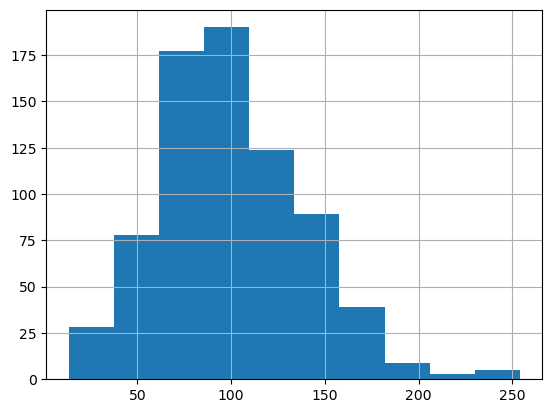

In [42]:
df.average_salary.hist()

<AxesSubplot: >

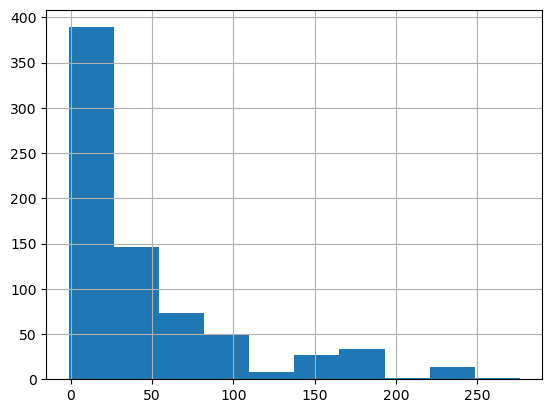

In [43]:
df.age.hist()

<AxesSubplot: >

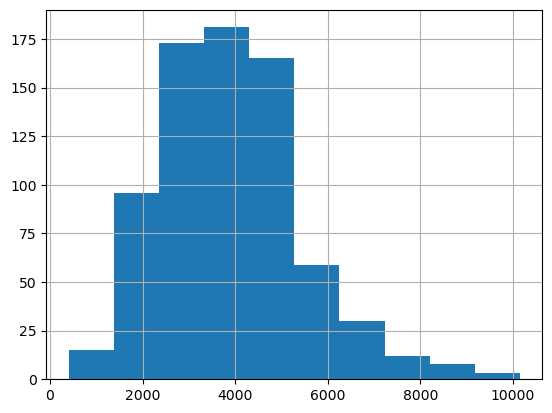

In [44]:
df.desc_len.hist()

<AxesSubplot: >

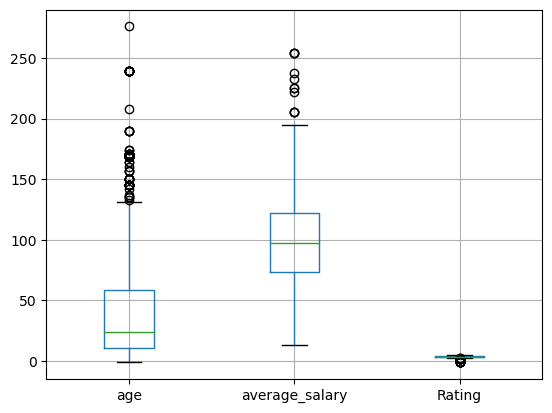

In [45]:
df.boxplot(column=['age','average_salary','Rating'])

<AxesSubplot: >

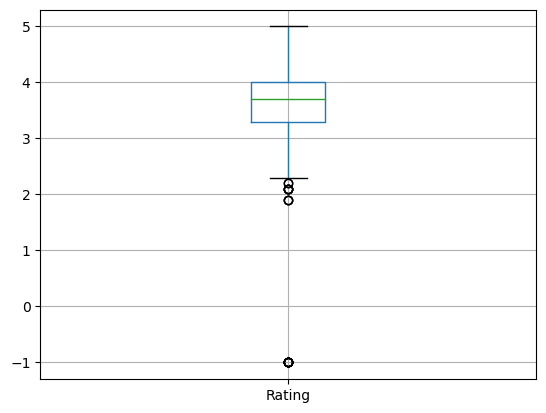

In [46]:
df.boxplot(column='Rating')

In [47]:
df[['age','average_salary','Rating','desc_len']].corr()

age  average_salary    Rating  desc_len
age             1.000000        0.019655  0.021655  0.165090
average_salary  0.019655        1.000000  0.013492  0.078093
Rating          0.021655        0.013492  1.000000 -0.012631
desc_len        0.165090        0.078093 -0.012631  1.000000

<AxesSubplot: >

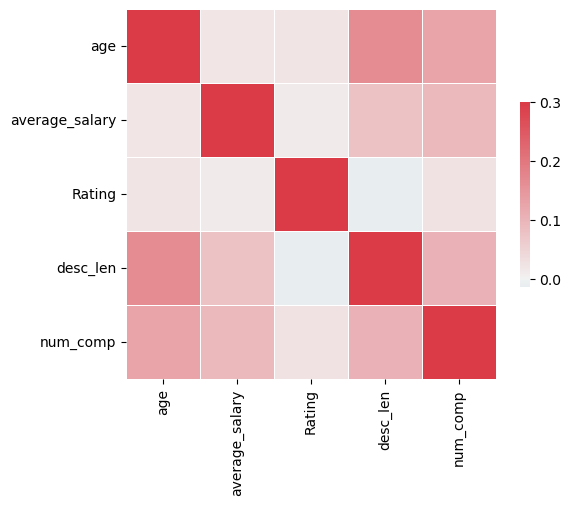

In [48]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','average_salary','Rating','desc_len','num_comp']].corr(),vmax=.3,center=0,cmap=cmap,
            square=True,linewidth=.5,cbar_kws={'shrink':.5})

In [49]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simplifier',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [50]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt','job_state', 'same_state','python_yn', 'R_yn',
     'spark', 'aws', 'excel', 'job_simplifier', 'seniority']]

graph for Location: total = 200


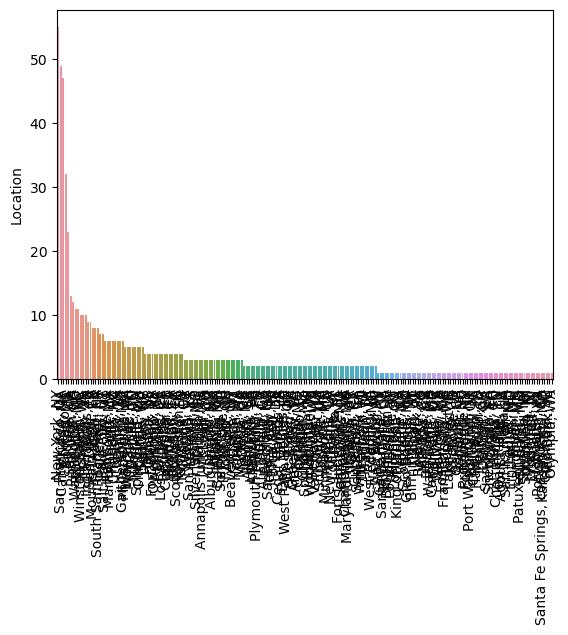

graph for Headquarters: total = 198


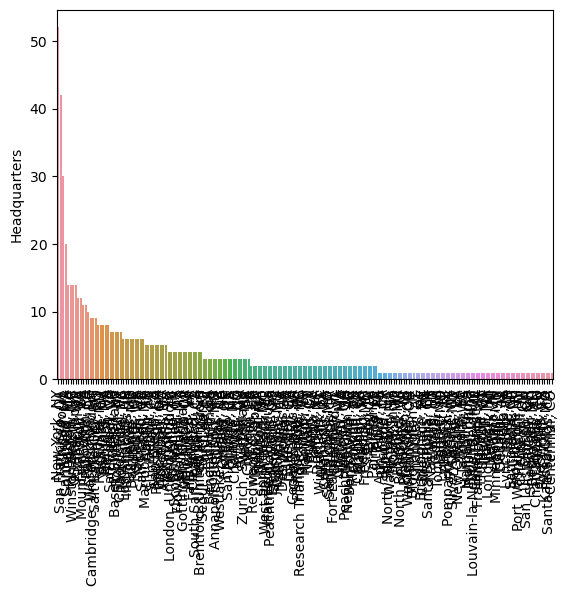

graph for Size: total = 9


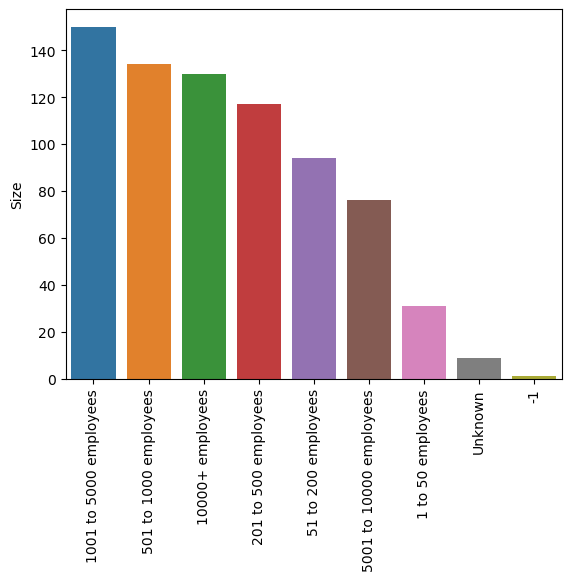

graph for Type of ownership: total = 11


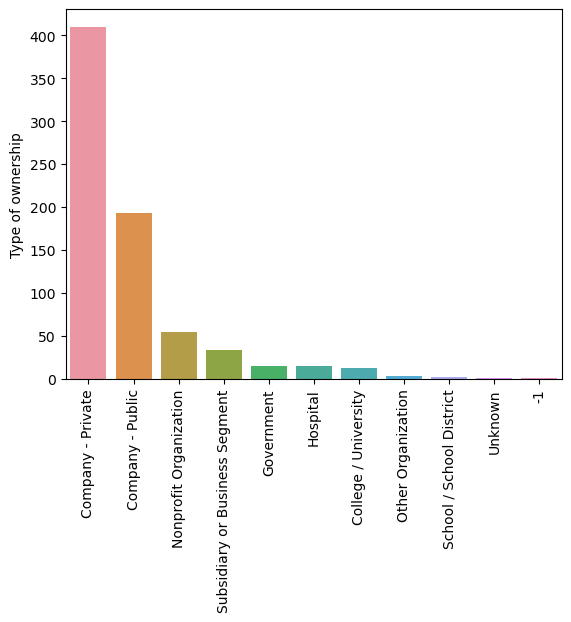

graph for Industry: total = 60


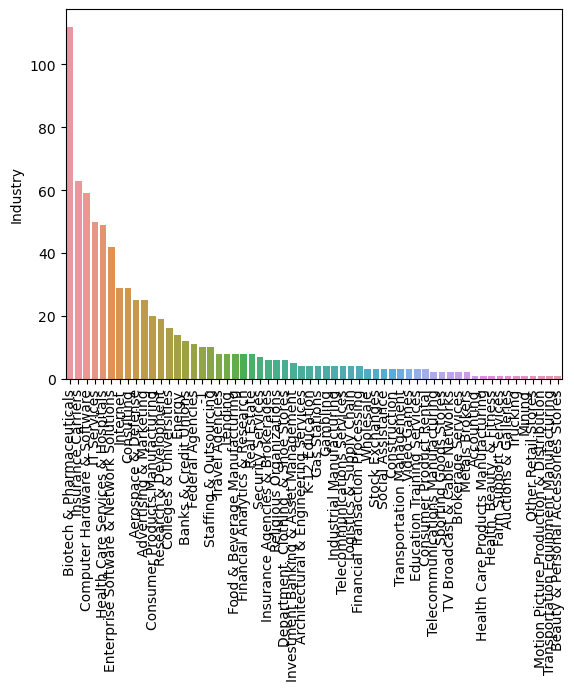

graph for Sector: total = 25


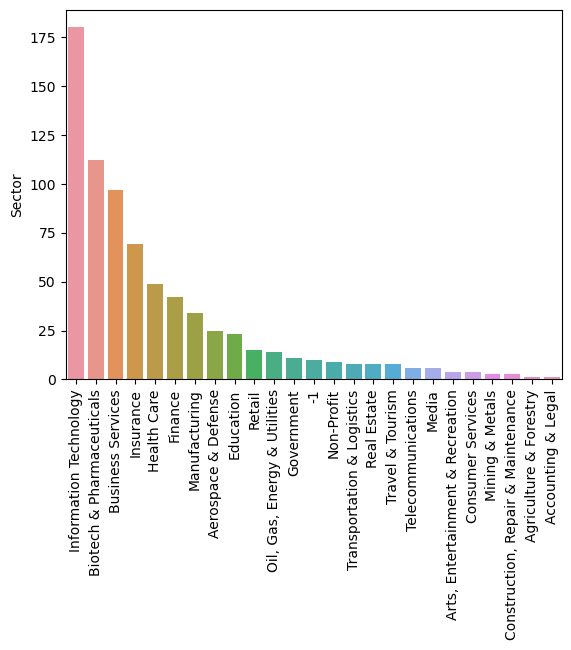

graph for Revenue: total = 14


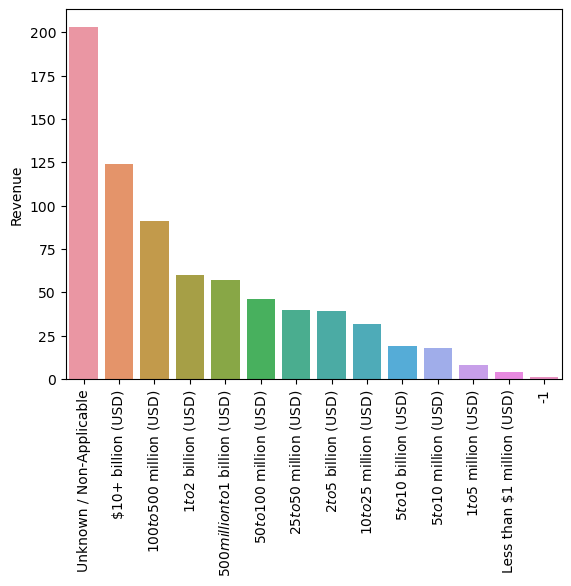

graph for company_txt: total = 343


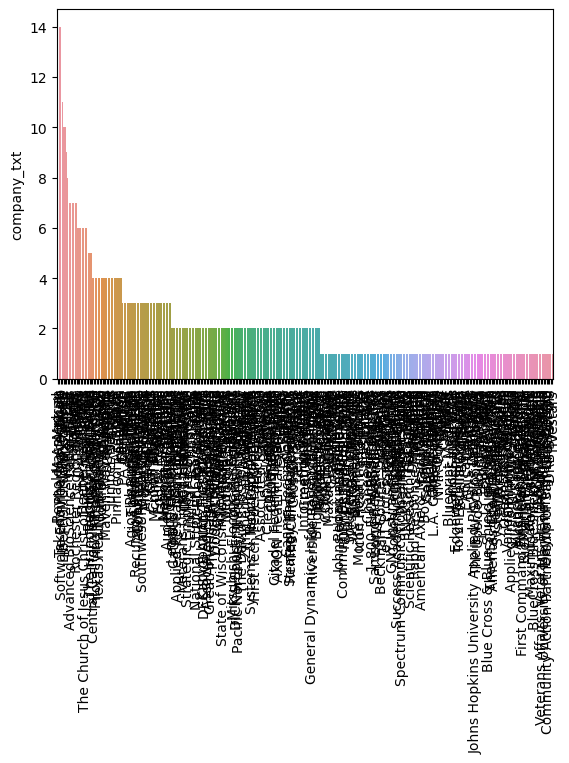

graph for job_state: total = 37


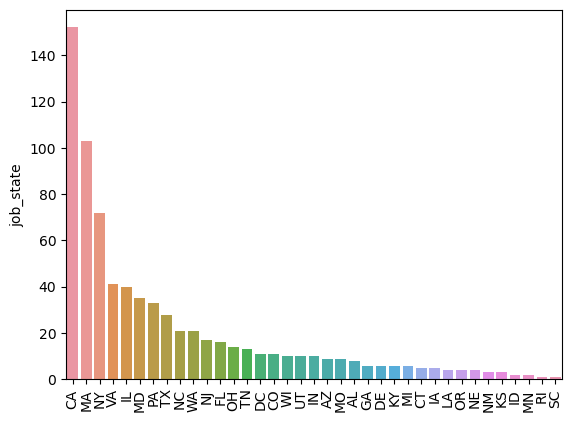

graph for same_state: total = 2


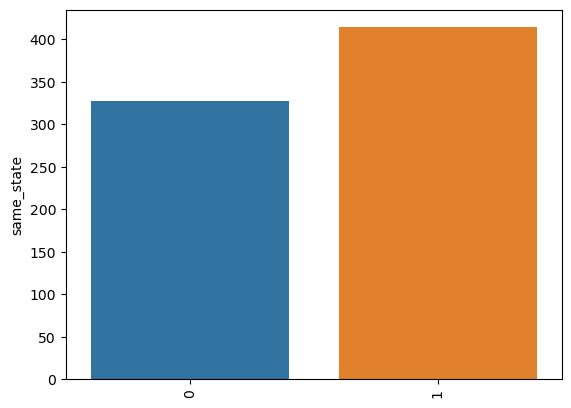

graph for python_yn: total = 2


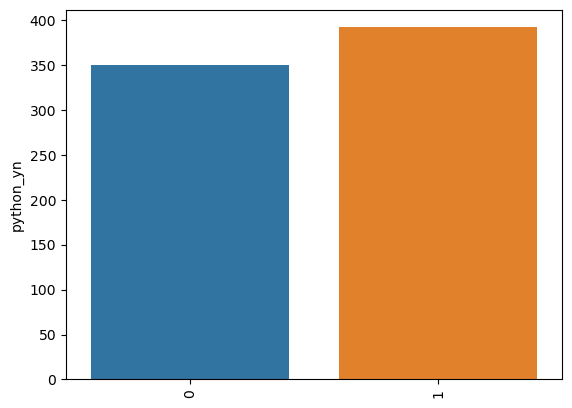

graph for R_yn: total = 2


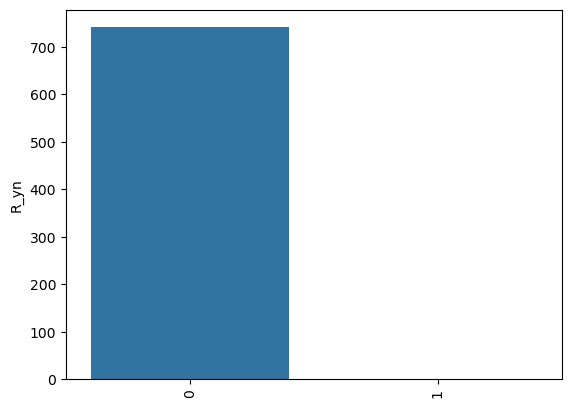

graph for spark: total = 2


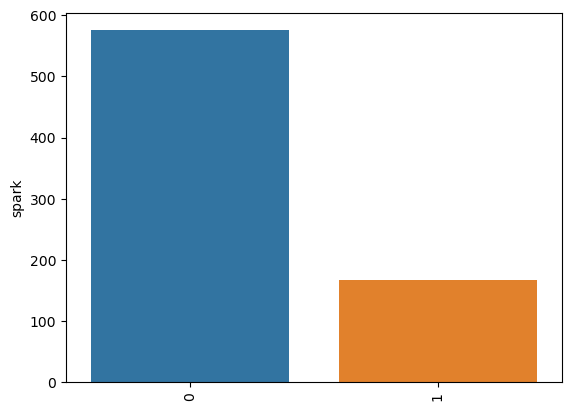

graph for aws: total = 2


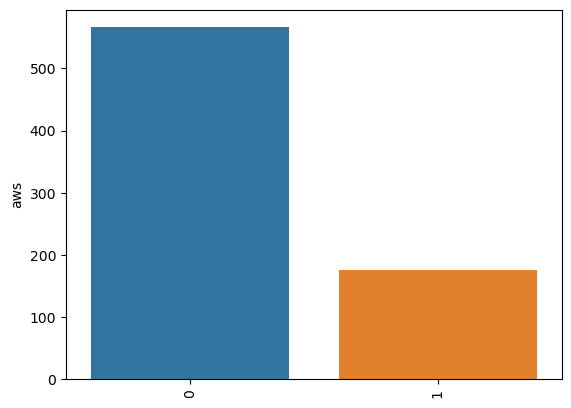

graph for excel: total = 2


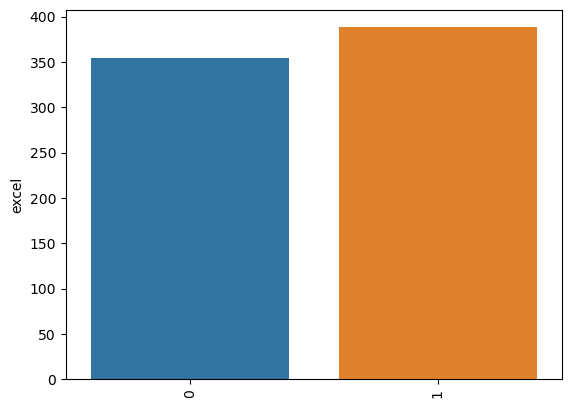

graph for job_simplifier: total = 7


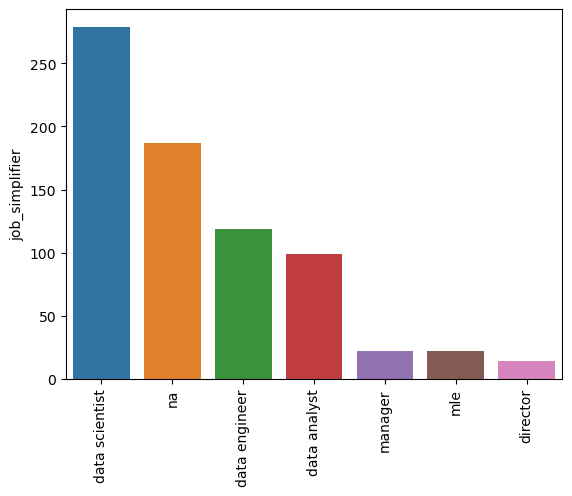

graph for seniority: total = 3


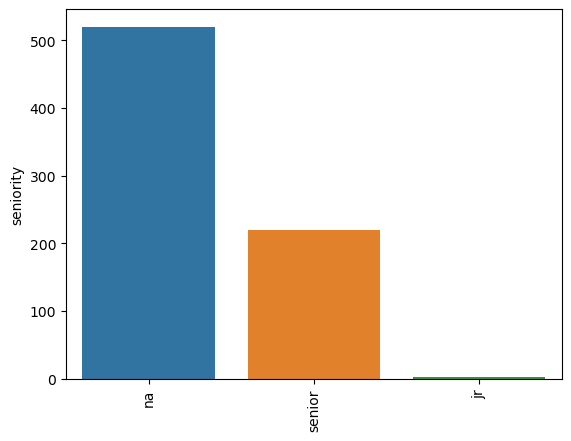

In [51]:
for i in df_cat.columns:
    print('graph for %s: total = %d' %(i,len(df_cat[i].value_counts())))
    sns.barplot(x=df_cat[i].value_counts().index, y = df_cat[i].value_counts())
    plt.xticks(rotation=90)
    plt.show()

In [52]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simplifier',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [53]:
pd.pivot_table(df,index='job_simplifier',values='average_salary')

average_salary
job_simplifier                
data analyst         64.621212
data engineer       105.403361
data scientist      117.564516
director            168.607143
manager              84.022727
mle                 126.431818
na                   85.203209

In [54]:
pd.pivot_table(df,index=['job_simplifier','seniority'],values='average_salary')

average_salary
job_simplifier seniority                
data analyst   jr              56.500000
               na              60.812500
               senior          75.480769
data engineer  na              96.701220
               senior         124.689189
data scientist jr             106.500000
               na             107.043011
               senior         138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               senior         142.071429
na             na              73.980620
               senior         110.163793

In [55]:
pd.set_option('display.max_rows',None)
pd.pivot_table(df,index=['job_state','job_simplifier'],values='average_salary',aggfunc='count').sort_values('job_state',ascending=False)

average_salary
job_state job_simplifier                
WI        na                           4
          data scientist               3
          data analyst                 3
WA        na                           1
          data scientist              17
          data analyst                 3
VA        na                           5
          mle                          2
          data scientist              18
          data engineer               10
          data analyst                 6
UT        data engineer                3
          data analyst                 4
          data scientist               3
TX        na                           7
          data scientist              13
          data engineer                8
TN        data scientist               1
          data engineer               10
          data analyst                 2
SC        na                           1
RI        data analyst                 1
PA        manager                      3
          data engineer                1
          data scientist               6
          data analyst                 8
          mle                          7
          na                           8
OR        data scientist               3
          data engineer                1
OH        na                           4
          data scientist               7
          data analyst                 3
NY        na                          12
          mle                          2
          data scientist              40
          data engineer                4
          data analyst                14
NM        data scientist               3
NJ        data scientist               4
          data analyst                 5
          data engineer                2
          manager                      2
          director                     2
          na                           2
NE        na                           4
NC        na                          12
          data scientist               3
          data engineer                6
MO        na                           3
          manager                      1
          data scientist               3
          data analyst                 2
MN        data engineer                1
          data analyst                 1
MI        manager                      2
          data scientist               4
MD        na                          16
          data scientist              13
          data engineer                3
          data analyst                 3
MA        na                          46
          manager                      5
          director                     6
          data scientist              30
          data engineer               12
          data analyst                 4
LA        data analyst                 1
          data engineer                2
          na                           1
KY        na                           4
          data scientist               2
KS        mle                          3
IN        na                           4
          data scientist               2
          data engineer                4
IL        data analyst                 3
          na                           6
          mle                          2
          director                     6
          data scientist              15
          data engineer                8
ID        data analyst                 2
IA        data analyst                 2
          data engineer                3
GA        data scientist               3
          na                           3
FL        data scientist               7
          data engineer                3
          data analyst                 6
DE        na                           6
DC        data scientist               5
          data engineer                4
          data analyst                 2
CT        na                           3
          data scientist               2
CO      

In [56]:
pd.pivot_table(df[df.job_simplifier == 'data scientist'],index='job_state',values='average_salary').sort_values('average_salary',ascending=False)

average_salary
job_state                
DC             149.000000
CA             142.522059
UT             140.500000
MO             127.666667
IL             117.233333
NC             117.000000
NY             115.250000
MA             113.750000
WI             113.500000
PA             113.333333
MD             109.115385
CO             108.666667
VA             108.416667
NJ             106.875000
MI             106.625000
OH             105.285714
TX             100.730769
WA              99.764706
OR              98.500000
FL              97.357143
TN              96.000000
IN              84.500000
KY              84.000000
CT              84.000000
GA              81.333333
NM              74.333333
AZ              69.500000

In [57]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simplifier',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [58]:
# rating , industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, type of ownership


In [59]:
df_pivots = df[['Rating','Industry','Sector','Revenue','num_comp','hourly','employer_provided','python_yn','R_yn','spark','aws','excel','Type of ownership','average_salary']]

In [60]:
#for i in df_pivots.columns:
#    print(i)
#    print(pd.pivot_table(df_pivots,index=i,values='average_salary').sort_values('average_salary',ascending=False))

In [61]:
pd.pivot_table(df_pivots,index='Revenue',columns='python_yn',values='average_salary',aggfunc='count')

python_yn                            0      1
Revenue                                      
$1 to $2 billion (USD)            16.0   44.0
$1 to $5 million (USD)             1.0    7.0
$10 to $25 million (USD)          16.0   16.0
$10+ billion (USD)                66.0   58.0
$100 to $500 million (USD)        47.0   44.0
$2 to $5 billion (USD)            17.0   22.0
$25 to $50 million (USD)          24.0   16.0
$5 to $10 billion (USD)            9.0   10.0
$5 to $10 million (USD)            9.0    9.0
$50 to $100 million (USD)         21.0   25.0
$500 million to $1 billion (USD)  29.0   28.0
-1                                 1.0    NaN
Less than $1 million (USD)         1.0    3.0
Unknown / Non-Applicable          93.0  110.0

In [62]:
df.to_csv('eda_data.csv',index=False)